## Comparing distribution of real part of spectra

In [74]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pickle
from scipy import stats

### Modifiable settings

In [84]:
nMin, nMax = 2, 8

In [83]:
def cumulative(data) :
    sort = [np.sort(data[i]) for i in range(len(data))]
    CDF = [np.cumsum(np.ones_like(data[i]))/len(data[i]) for i in range(len(data))]

    return sort, CDF

In [85]:
with open('sorted_data/real_May_N2-7.pickle', 'rb') as file:
    realMay = pickle.load(file)
xMay, yMay = cumulative(realMay)

with open('sorted_data/real_1-link_N2-7.pickle', 'rb') as file:
    realEvol1 = pickle.load(file)
xEvol1, yEvol1 = cumulative(realEvol1)

with open('sorted_data/real_2-links_N2-7.pickle', 'rb') as file:
    realEvol2 = pickle.load(file)
xEvol2, yEvol2 = cumulative(realEvol2)

### Kolmogorov–Smirnov test

size:  2, p-value: 0.0000
size:  3, p-value: 0.0000
size:  4, p-value: 0.0000
size:  5, p-value: 0.0000
size:  6, p-value: 0.0000
size:  7, p-value: 0.0000


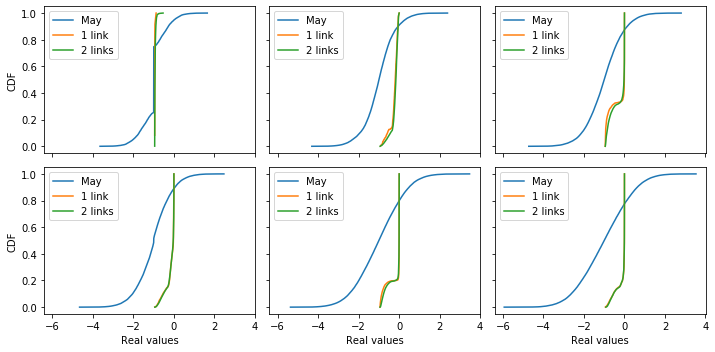

In [86]:
fig, axes = plt.subplots(2,3, figsize=(10,5), sharex=True, sharey=True);
axes[0,0].set(ylabel='CDF')
axes[1,0].set(xlabel='Real values', ylabel='CDF')
axes[1,1].set(xlabel='Real values')
axes[1,2].set(xlabel='Real values')

i = 0
for ax in axes.flat :
    # Kolmogorov-Smirnov
    _, p_ks = stats.ks_2samp(xMay[i], xEvol[i])
    print(f'size: {nMin+i:2.0f}, p-value: {p_ks:2.4f}')
    
    ax.plot(xMay[i], yMay[i], label='May');
    ax.plot(xEvol1[i], yEvol1[i], label='1 link');
    ax.plot(xEvol2[i], yEvol2[i], label='2 links');
    ax.legend();
    
    i += 1
    
fig.tight_layout();

In [87]:
fig.savefig('figs/CDF_real_eigenvalues.png', dpi=100);

### Potential issues and future tasks
- KS-test only for continuous distributions...
- Adjust to same size
- Add unstable eigenvalues